<a href="https://colab.research.google.com/github/fiftybucks101/Hierarchical-clustering/blob/main/hierarchical_clustering_understanding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [17]:
df = pd.read_csv('/content/ClusteringHSS.csv')
df.head()

,ID,Gender_Code,Region,Income,Spending
0,1,Female,Rural,20.0,15.0
1,2,Male,Rural,5.0,12.0
2,3,Female,Urban,28.0,18.0
3,4,Male,Urban,40.0,10.0
4,5,Male,Urban,42.0,9.0


In [3]:
df.describe()

,ID,Income,Spending
count,1113.00000,1107.000000,1108.000000
mean,557.00000,26.020777,11.275271
std,321.43973,13.374036,4.598126
min,1.00000,5.000000,5.000000
25%,279.00000,14.000000,7.000000
50%,557.00000,25.000000,10.000000
75%,835.00000,37.000000,15.000000
max,1113.00000,50.000000,20.000000


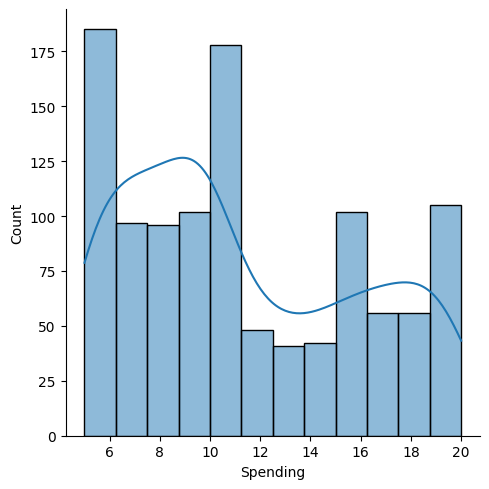

In [10]:
sns.displot(df['Spending'], kde=True)

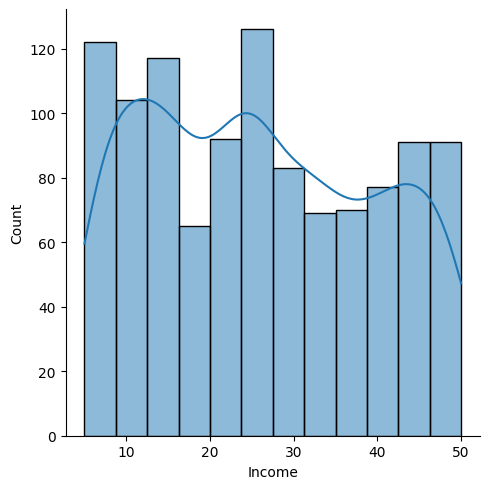

In [11]:
sns.displot(df['Income'], kde=True)

In [12]:
df.shape

(1113, 5)

In [19]:
rand = np.random.randint(1,1113,200)
rand

array([ 866,  190,  201,  618,   75,  203,  806,  731,  465,  951,  408,
       1067,  178,  623,  282,  592,  412,    6,  553,  832,  594,  119,
        791,  369,  186,  326,   80,  511,  681,  950,  850,  346, 1057,
        582, 1110,  384,  319,  111,  543,   12, 1064,  920,  727, 1021,
         33,  692,  992,   27,    8,  279,  612,  682,  394, 1087,  645,
        978,  627,  436,  844,  718,  891,  225,  445,  208, 1021,  187,
        999,  999,  841,  909,  600, 1031, 1007,  295,    7, 1046,  533,
        245,  292,  973,  651,  763,  502,  269,  608,  785,  163, 1042,
        194,  910,  199,  644,  545,  747,  454,  874,  836,  328,  574,
        305,   86,  867,  914,  930,  415,   24,  737,  484,  315,  947,
        264,  145,    3,  243,  278,  302,  941,  482, 1016,  713,  631,
        511,  431,  473,  125,  604,  325, 1038,  140,  263,  605,  955,
        333,  406,  428,  162,  618,  600,  437,  508,   46,  932,  641,
        332,  827,  397,  657,  817,  545,  518,  8

In [24]:
data = df.iloc[rand,3:5]
data

,Income,Spending
866,44.0,12.0
190,34.0,6.0
201,26.0,10.0
618,24.0,17.0
75,14.0,10.0
...,...,...
117,14.0,17.0
143,48.0,8.0
1036,17.0,7.0
142,46.0,13.0


In [21]:
data.shape

(200, 2)

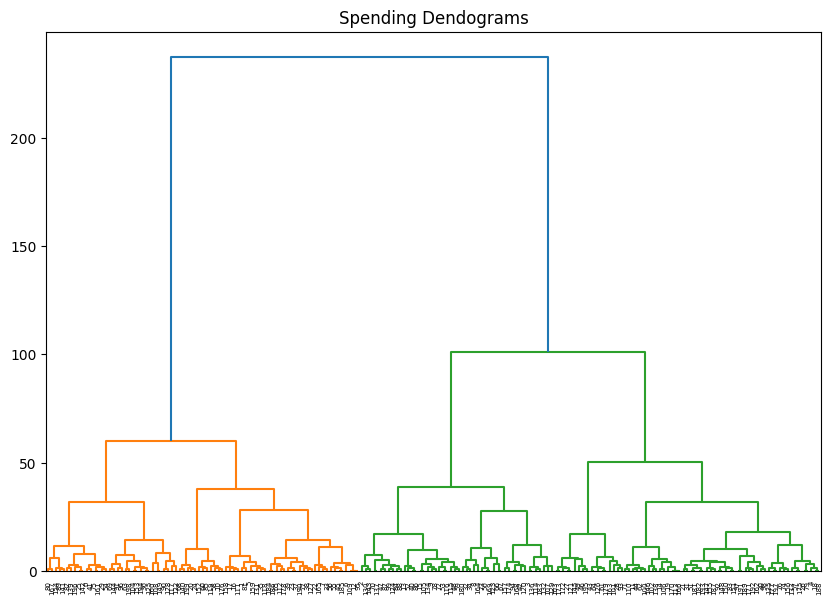

In [35]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10,7))
plt.title("Spending Dendograms")
dend = shc.dendrogram(shc.linkage(data, method='ward'))

In [26]:
from sklearn.cluster import AgglomerativeClustering


In [39]:
cluster = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')
labels_=cluster.fit_predict(data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [40]:
labels_

array([1, 0, 5, 3, 2, 0, 0, 0, 3, 5, 0, 2, 0, 5, 2, 5, 0, 0, 2, 2, 0, 2,
       0, 0, 0, 1, 2, 4, 4, 1, 2, 2, 3, 0, 3, 0, 1, 0, 0, 0, 5, 1, 3, 4,
       2, 0, 4, 5, 5, 4, 3, 2, 5, 5, 1, 0, 0, 2, 0, 5, 0, 4, 2, 1, 4, 0,
       3, 3, 0, 1, 5, 2, 5, 3, 2, 1, 2, 0, 5, 2, 1, 0, 1, 2, 5, 0, 5, 5,
       5, 1, 1, 1, 2, 4, 3, 0, 1, 2, 2, 5, 2, 4, 2, 4, 1, 5, 2, 3, 1, 0,
       2, 0, 0, 2, 3, 5, 5, 1, 0, 0, 3, 4, 1, 3, 5, 1, 4, 0, 1, 3, 5, 0,
       3, 2, 5, 2, 3, 5, 2, 1, 0, 1, 1, 5, 1, 4, 2, 2, 2, 1, 2, 2, 0, 1,
       1, 2, 2, 3, 0, 0, 1, 1, 2, 4, 3, 0, 2, 1, 3, 3, 2, 2, 4, 4, 3, 2,
       0, 2, 0, 4, 3, 2, 2, 3, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 1, 4, 1, 2,
       1, 0])

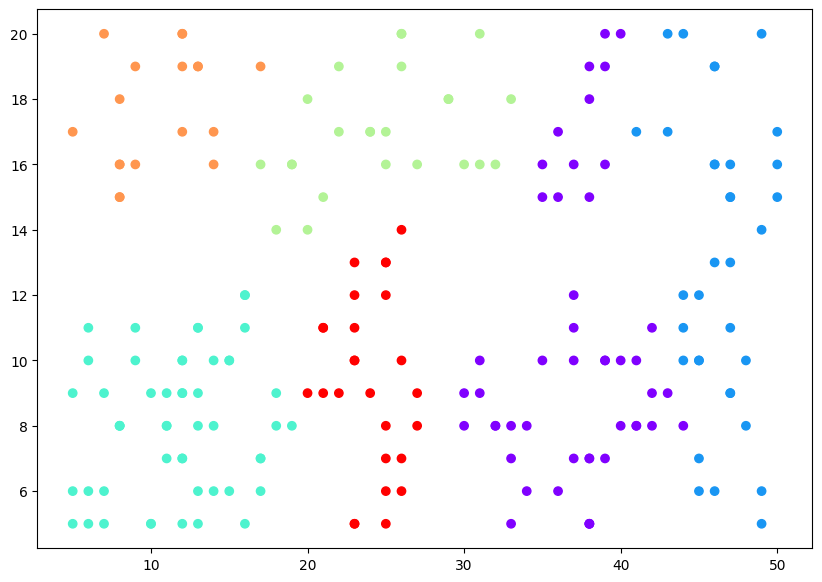

In [41]:
plt.figure(figsize=(10, 7))
plt.scatter(data.iloc[:,0], data.iloc[:,1], c=cluster.labels_, cmap='rainbow')

In [42]:
from sklearn.cluster import KMeans

wcss = []

for i in range(1,11):
  km = KMeans(n_clusters=i)
  km.fit_predict(data)
  wcss.append(km.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

In [43]:
wcss

[41318.634999999995,
 12414.708603896106,
 7657.927490365926,
 6135.209700854701,
 4914.982491880666,
 3981.4471470530793,
 3268.119466717076,
 2695.8941631825937,
 2233.6286306914567,
 1946.0268171145967]

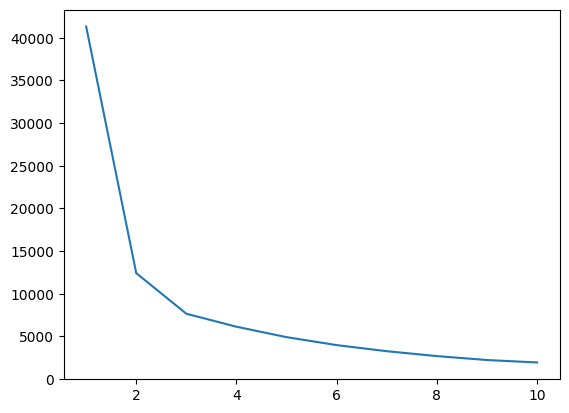

In [44]:
plt.plot(range(1,11),wcss)


In [48]:
X = data.iloc[:,:].values
km = KMeans(n_clusters=3)
y_means = km.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


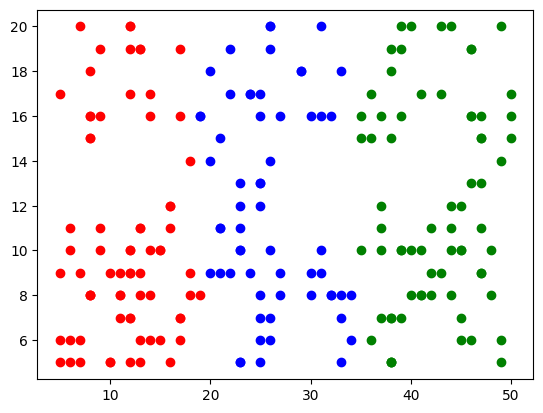

In [49]:
plt.scatter(X[y_means == 0,0],X[y_means == 0,1],color = 'blue')
plt.scatter(X[y_means == 1,0],X[y_means == 1,1],color = 'red')
plt.scatter(X[y_means == 2,0],X[y_means == 2,1],color = 'green')
plt.scatter(X[y_means == 3,0],X[y_means == 3,1],color = 'yellow')

In [51]:
data.describe()

,Income,Spending
count,200.000000,200.000000
mean,26.615000,11.560000
std,13.632903,4.666399
min,5.000000,5.000000
25%,13.750000,8.000000
50%,25.000000,10.000000
75%,39.000000,16.000000
max,50.000000,20.000000


In [55]:
data = pd.read_csv('/content/student_clustering.csv')

In [56]:
data

,cgpa,iq
0,5.13,88
1,5.90,113
2,8.36,93
3,8.27,97
4,5.45,110
...,...,...
195,4.68,89
196,8.57,118
197,5.85,112
198,6.23,108


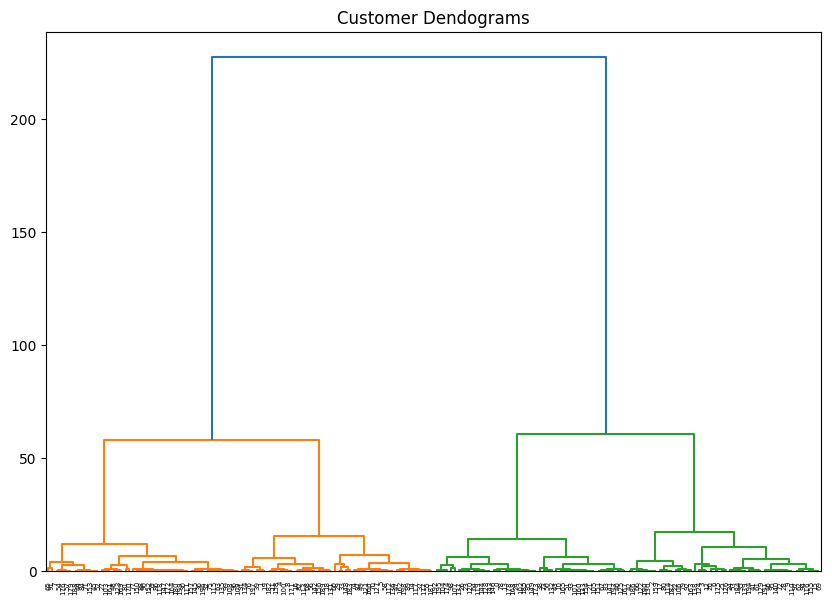

In [58]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(data, method='ward'))


In [63]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
labels_=cluster.fit_predict(data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


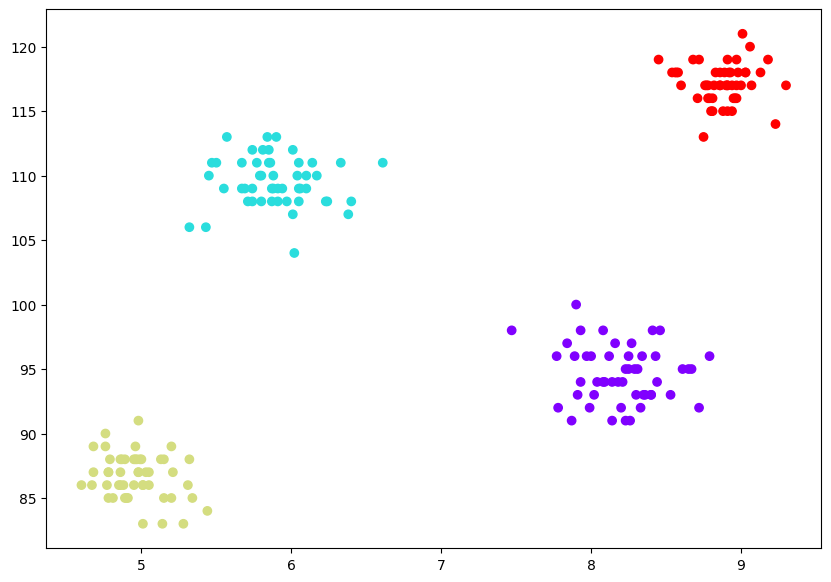

In [64]:
plt.figure(figsize=(10, 7))
plt.scatter(data.iloc[:,0], data.iloc[:,1], c=cluster.labels_, cmap='rainbow')